## Term project

#### Student : Asja Basovic

### 1. About my dataset

### Basic information
The dataset was collected by F. Yağın et al. in 2023 to conduct a study about obesity. The study aimed to predict the level of obesity based on physical activity and eating habits using the trained neural network model.This dataset includes data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. More information about the research can be found on: https://www.semanticscholar.org/paper/Estimation-of-Obesity-Levels-with-a-Trained-Neural-Ya%C4%9F%C4%B1n-G%C3%BCl%C3%BC/2c1eab51db154493d225c8b86ba885bbaf147a2c ". Personally, I have found the dataset on Kaggle.

The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
df= pd.read_csv(r"C:\Users\Asja\Downloads\archive (7)\ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.dtypes

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

### The number of attributes and records and what they are
The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

### Data types and their dependancy (before any changes I make)
Gender: Independant, Categorical, Female or Male (string)

Age: Independant, Continuous (float)

Height: Independant, Continuous (float)

Weight: Independant, Continuous (float)

family_history_with_overweight: Independant, Binary (yes or no), "Has a family member suffered or suffers from overweightness?"
(string)

FAVC: Independant, Binary (yes or no), "Do you eat high caloric food frequently?" (string)

FCVC: Independant, Integer, "Do you usually eat vegetables in your meals? "

NCP: Independant, Continuous, "How many main meals do you have daily? "

CAEC: Independant, Categorical, "Do you eat any food between meals? "

SMOKE: Independant, Binary, "Do you smoke? "

CH2O: Independant, Continuous, "How much water do you drink daily? "

SCC: Independant, Binary, "Do you monitor the calories you eat daily? "

FAF: Independant, Continuous, "How often do you have physical activity? "

TUE: Independant, Integer, "How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

CALC: Independant, Categorical, "How often do you drink alcohol? "

MTRANS: Independant, Categorical, "Which transportation do you usually use? "

NObeyesdad: Dependant, Categorical, "Obesity level" 



Only NObeyesdad is dependant because this dataset uses all of the attributes such as age, weight, physical activity, etc. to check the person's obesity level. In other words, a person's weight depends on the data in all of the other columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

As mentioned there are 2111 records and there are no null values. Most of the data is numerical. The records of type object are strings that hold either binary or categorical data.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


We can see here that the average age of the people who's data was collected is 24 years old, with the minimum being 14 and maximum being 61. This shows that a wide range of people were included. The dataset is diverse.

We can also see that the minimum height and weight make sense considering the minimum age. 

The standard deviation for weight is also quite high which shows that the weights are spread out around the mean.

NCP (meals per day) has the minimum 1 and maximum 4, with mean being around 2.5. This shows that there are no extremes in this category (such as someone not eating at all or eating a high number of times a day).

FCVC("Do you usually eat vegetables in your meals?") and CH20 ( "How much water do you drink daily?") seem very similar in their statistics which may indicate that they are correlated. 

### First thing I want to check is the mean weight and height for each age group

Age groups will be from 10 to 20 (10s), from 20 to 30 (20s), from 30 to 40 (30s)... until 60 to 70 (60s) because the max age is 61.

In [7]:
bins = range(10, 71, 10)  
labels = [f"{i}s" for i in range(10, 70, 10)]  
df["Age_group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,Age_group
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,20s
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,20s
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,20s
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I,20s
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,20s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,20s
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,20s
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,20s
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,20s


In [8]:
df.groupby('Age_group')[['Weight', 'Height']].mean()

,Weight,Height
Age_group,,
10s,72.593632,1.701932
20s,91.298602,1.700758
30s,92.736880,1.713508
40s,87.438932,1.653293
50s,79.446176,1.705046
60s,66.000000,1.650000


I also want to see the data sorted by gender

In [9]:
df.groupby(['Age_group', 'Gender'])[['Weight', 'Height']].mean()

Weight    Height
Age_group Gender                      
10s       Female   71.084352  1.645407
          Male     74.365661  1.768298
20s       Female   89.667048  1.649612
          Male     92.930157  1.751905
30s       Female   73.182562  1.615697
          Male    104.160718  1.770651
40s       Female   78.002219  1.603065
          Male    104.325680  1.743174
50s       Female   68.500000  1.640000
          Male     82.573655  1.723630
60s       Female   66.000000  1.650000
          Male           NaN       NaN

We can clearly see that males tend to be both heavier and taller than females. There are no males in the 60s age group.

In [10]:
df.pivot_table(values=['Weight', 'Height'], columns='Gender', index='Age_group', aggfunc=['mean', 'max'], margins=True)

mean                                                        \
             Height                         Weight                          
Gender       Female      Male       All     Female        Male        All   
Age_group                                                                   
10s        1.645407  1.768298  1.701932  71.084352   74.365661  72.593632   
20s        1.649612  1.751905  1.700758  89.667048   92.930157  91.298602   
30s        1.615697  1.770651  1.713508  73.182562  104.160718  92.736880   
40s        1.603065  1.743174  1.653293  78.002219  104.325680  87.438932   
50s        1.640000  1.723630  1.705046  68.500000   82.573655  79.446176   
60s        1.650000       NaN  1.650000  66.000000         NaN  66.000000   
All        1.643298  1.758690  1.701677  82.302364   90.769478  86.586058   

                max                                                          
             Height                          Weight                          
Gender       Female      Male       All      Female        Male         All  
Age_group                                                                    
10s        1.830068  1.942725  1.942725  160.935351  173.000000  173.000000  
20s        1.843419  1.980000  1.980000  165.057269  129.991623  165.057269  
30s        1.739293  1.920000  1.920000   90.000000  130.000000  130.000000  
40s        1.768231  1.800000  1.800000   86.945380  118.000000  118.000000  
50s        1.690000  1.790000  1.790000   87.000000   90.000000   90.000000  
60s        1.650000       NaN  1.650000   66.000000         NaN   66.000000  
All        1.843419  1.980000  1.980000  165.057269  173.000000  173.000000

I made the pivot table to check some more data more easily:
-the tallest female is 1.843419 but the average height for females is 1.643298
-the tallest male is 1.980000 but the average height for males is 1.758690
-the heaviest female is 165.057269 but the average weight for females is 82.302364
-the heaviest male is 173.000000 but the average weight for males is 90.769478

### Second thing I want to check is if there is a correlation between FCVC and CH20

FCVC("Do you usually eat vegetables in your meals?") and CH20 ( "How much water do you drink daily?")

In [11]:
df2=df[['FCVC', 'CH2O']]
df2.corr(method='spearman') #spearman is suitable for ordinal data

,FCVC,CH2O
FCVC,1.000000,0.065693
CH2O,0.065693,1.000000


I assumed that there would be a higher correlation but 0.07 is quite low so the two variables are not very correlated. 
I now want to check which two numerical variables have the highest correlation.

In [12]:
df2=df.select_dtypes(include=['float64', 'int64'])
correlations_found=df2.corr()
correlations_found

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


In [13]:
correlations_found = correlations_found.unstack()
correlations =correlations_found[correlations_found<1]
correlations = correlations.drop_duplicates() 
correlations = correlations.abs().sort_values(ascending=False)

print("Highest correlations between different attributes:")
print(correlations.head())

Highest correlations between different attributes:
Height  Weight    0.463136
Age     TUE       0.296931
Height  FAF       0.294709
        NCP       0.243672
Weight  FCVC      0.216125
dtype: float64


It seems that height and weight have the highest correlation, but the correlation is still not very high. This data implies that the independant variables are also indpendant from each other. 

### Third thing I want to check is how responses are distributed in CALC and MTRANS

CALC: Independant, Categorical, "How often do you drink alcohol?"

In [14]:
df.groupby('CALC')['Gender'].count()

CALC
Always           1
Frequently      70
Sometimes     1401
no             639
Name: Gender, dtype: int64

Most people only drink 'sometimes', and only 1 person drinks 'always'

In [15]:
df[df['CALC']=='Always'] # the person that drinks 'always' is a male in his 20s with normal weight

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,Age_group
26,21.0,Male,1.7,65.0,Always,yes,2.0,1.0,no,no,2.0,yes,1.0,2.0,Frequently,Walking,Normal_Weight,20s


MTRANS: Independant, Categorical, "Which transportation do you usually use?"

In [16]:
df.groupby('MTRANS')['Gender'].count()

MTRANS
Automobile                457
Bike                        7
Motorbike                  11
Public_Transportation    1580
Walking                    56
Name: Gender, dtype: int64

Most people use public transport, and then cars. Bikes and motorbikes are the least preferred.

### Fourth thing I want to check is how many unique values are in the Age column

In [17]:
df['Age'].nunique()

1402

Since there are 2111 rows(people), 1402 unique ages is quite high and makes for a diverse age group. 709 ages are repeated. This means 66% of the ages are unique.

### Fifth thing I want to check is how many smokers are in each age group

In [18]:
df.pivot_table(values='Gender', index='Age_group', columns='SMOKE', margins=True, aggfunc='count')

SMOKE,no,yes,All
Age_group,,,
10s,534,3,537
20s,1190,20,1210
30s,284,17,301
40s,52,1,53
50s,6,3,9
60s,1,0,1
All,2067,44,2111


Only 44 people smoke, and majority of them are in their 20s and 30s. We can also see that most people fall into the 20s category so that is also where most nonsmokers are.

## Visualization

#### First plot shows how many males and females there are in the dataset.

-there are slightly more males than females.

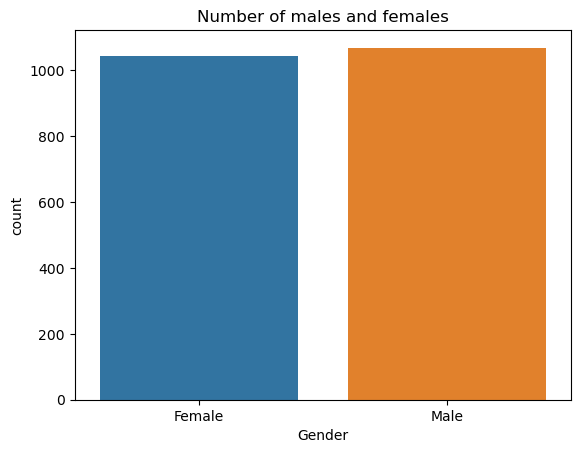

In [19]:
sns.countplot(data=df, x='Gender')
plt.title('Number of males and females')
plt.show()

#### Second plot shows the mean weight according to family history with overweight (yes/no)

-people who have/had overweight people in their family have a higher average weight than those who do not.

-perhaps this is the case due to similar lifestyles or due to genetics

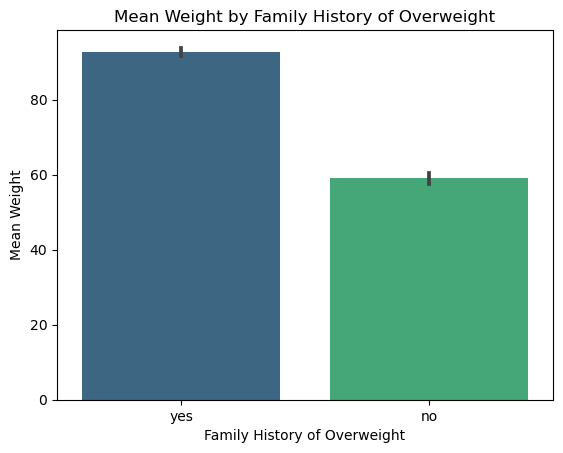

In [20]:
sns.barplot(x='family_history_with_overweight', y='Weight', data=df, estimator='mean', palette='viridis')
plt.title('Mean Weight by Family History of Overweight')
plt.xlabel('Family History of Overweight')
plt.ylabel('Mean Weight')
plt.show()

#### Third plot shows distribution of Height and Weight according to gender.

-confirmation of previous pivot table

-women here seem to be more likely to be overweight than men

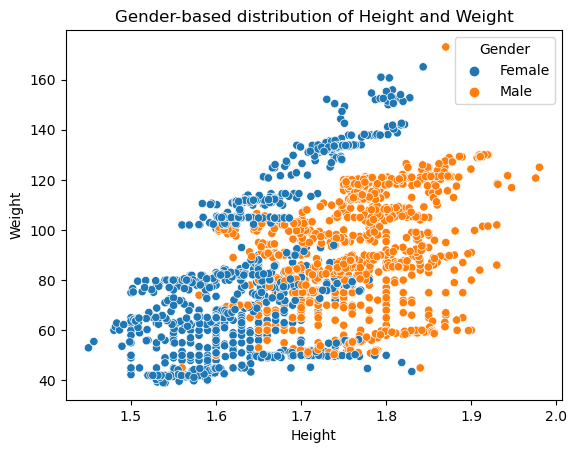

In [21]:
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=df)
plt.title('Gender-based distribution of Height and Weight')
plt.show()

#### Fourth graph shows the distribution of time spent using tech devices based on age groups.

-with age, people use their electronic devices less

-teenagers are most likely to use their tech devices for more than 2 hours

-everyone in the 50s and 60s group voted for 0h (9 people) and 1h (1 person), respectively.

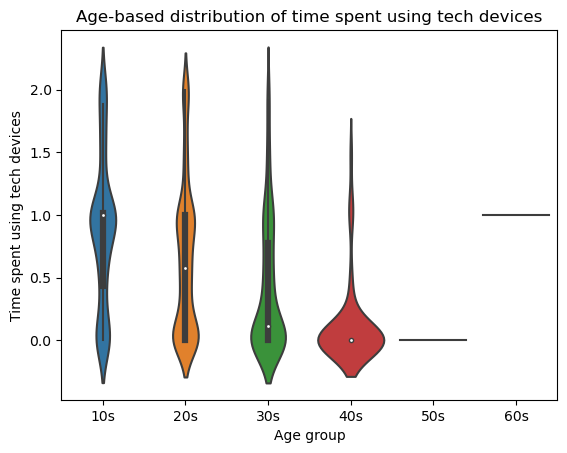

In [22]:
sns.violinplot(y='TUE', x='Age_group', data=df)
plt.title('Age-based distribution of time spent using tech devices')
plt.ylabel('Time spent using tech devices')
plt.xlabel('Age group')
plt.show()

#### Fifth graph is a confirmation of the previously calculated correlations.

-weak correlation between atributes

-strongest correlation between weight and height

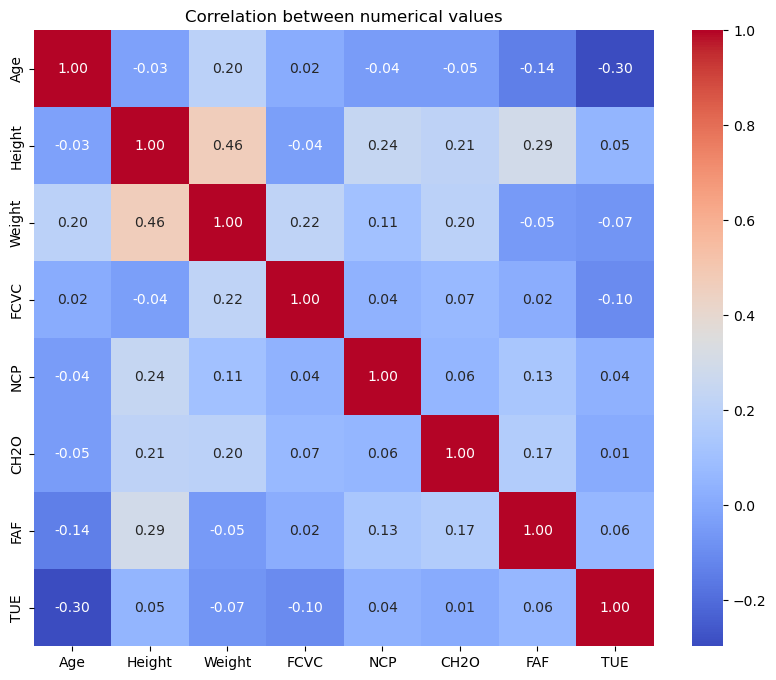

In [23]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between numerical values")
plt.show()

## Outliers

<Axes: >

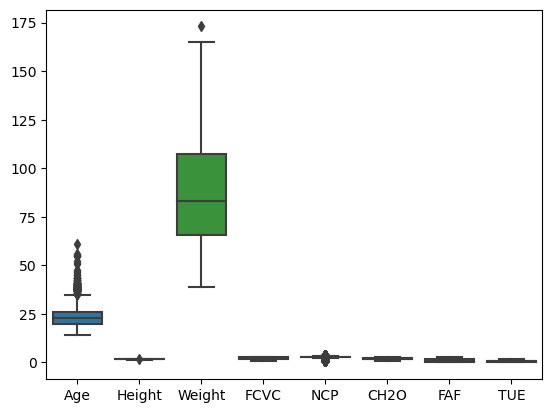

In [24]:
sns.boxplot(data=df)

<Axes: >

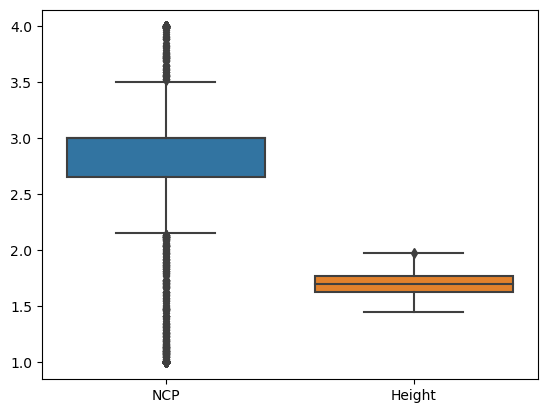

In [25]:
sns.boxplot(data=df[['NCP', 'Height']]) #just 'zooming in' to see properly

The outliers can be found in the Age and Weight columns. This is logical since as seen above, most people are in their 20s, so everyone that is significantly older is seen as an outlier (such as the one person that is on the 60s category). For weight, since this dataset aims to use the data to predict a person's obesity level, it seems logical to have some weights as outliers.

The other attributes, excluding height, are actually categorical or binary but represented as numbers. So, since they cannot take any extreme values outside of their rating scale, they do not have outliers. NCP seems to have outliers but that is only because majority answered that they have between 2 and 3.5 main meals a day, so everything else is seen as an outlier. However, the outliers make sense for the dataset.

Personally, I would not remove or change the outliers in this case, but for the sake of the project I will make a copy of the dataframe and replace the outliers with the max/min value.

In [26]:
df_outliers=df.copy() # making a copy of the dataframe to not mess up the data

In [27]:
Q1 = df_outliers['Age'].quantile(0.25)  
Q3 = df_outliers['Age'].quantile(0.75)  
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
replacement_value = df_outliers['Age'].median()

outliers = (df_outliers['Age'] < lower_bound) | (df_outliers['Age'] > upper_bound)
df_outliers.loc[outliers, 'Age'] = replacement_value

I replaced the outliers in age with the median value, since there are many outliers. But I removed the outliers in weight since there are not many in that column. I will ignore the outliers in NCP.

In [28]:
Q1 = df_outliers['Weight'].quantile(0.25)  
Q3 = df_outliers['Weight'].quantile(0.75) 
IQR = Q3 - Q1

# thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# removing outliers
df_outliers = df_outliers[(df_outliers['Weight'] >= lower_bound) & (df_outliers['Weight'] <= upper_bound)]

<Axes: >

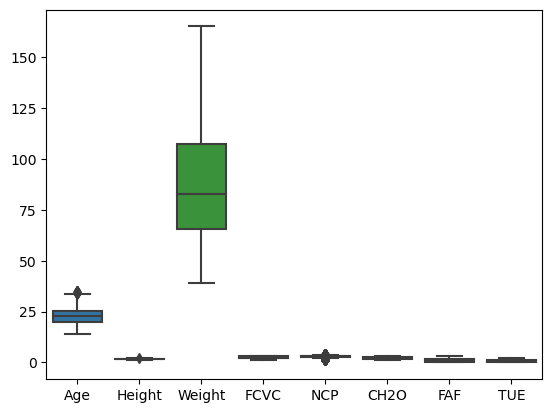

In [29]:
sns.boxplot(data=df_outliers) # checkimg if outliers are still present (the result is good)

## Null values

There are no null values in the dataset so, for the sake of the project, I will make a copy of the dataset and randomly generate null values. Then, I will solve the issue.

In [30]:
np.random.seed(42)
def random_missing_values(df, columns, missing_fraction=0.1):
    df_with_missing = df.copy()  
    for col in columns:
        if col in df.columns:
            random_missing_mask = np.random.rand(len(df)) < missing_fraction
            df_with_missing.loc[random_missing_mask, col] = np.nan    
    return df_with_missing

columns_to_modify = ['Age', 'SMOKE', 'Weight']
df_with_missing_values =random_missing_values(df, columns=columns_to_modify, missing_fraction=0.1)

In [31]:
df_with_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             1884 non-null   float64 
 1   Gender                          2111 non-null   object  
 2   Height                          2111 non-null   float64 
 3   Weight                          1904 non-null   float64 
 4   CALC                            2111 non-null   object  
 5   FAVC                            2111 non-null   object  
 6   FCVC                            2111 non-null   float64 
 7   NCP                             2111 non-null   float64 
 8   SCC                             2111 non-null   object  
 9   SMOKE                           1887 non-null   object  
 10  CH2O                            2111 non-null   float64 
 11  family_history_with_overweight  2111 non-null   object  
 12  FAF                 

<Axes: >

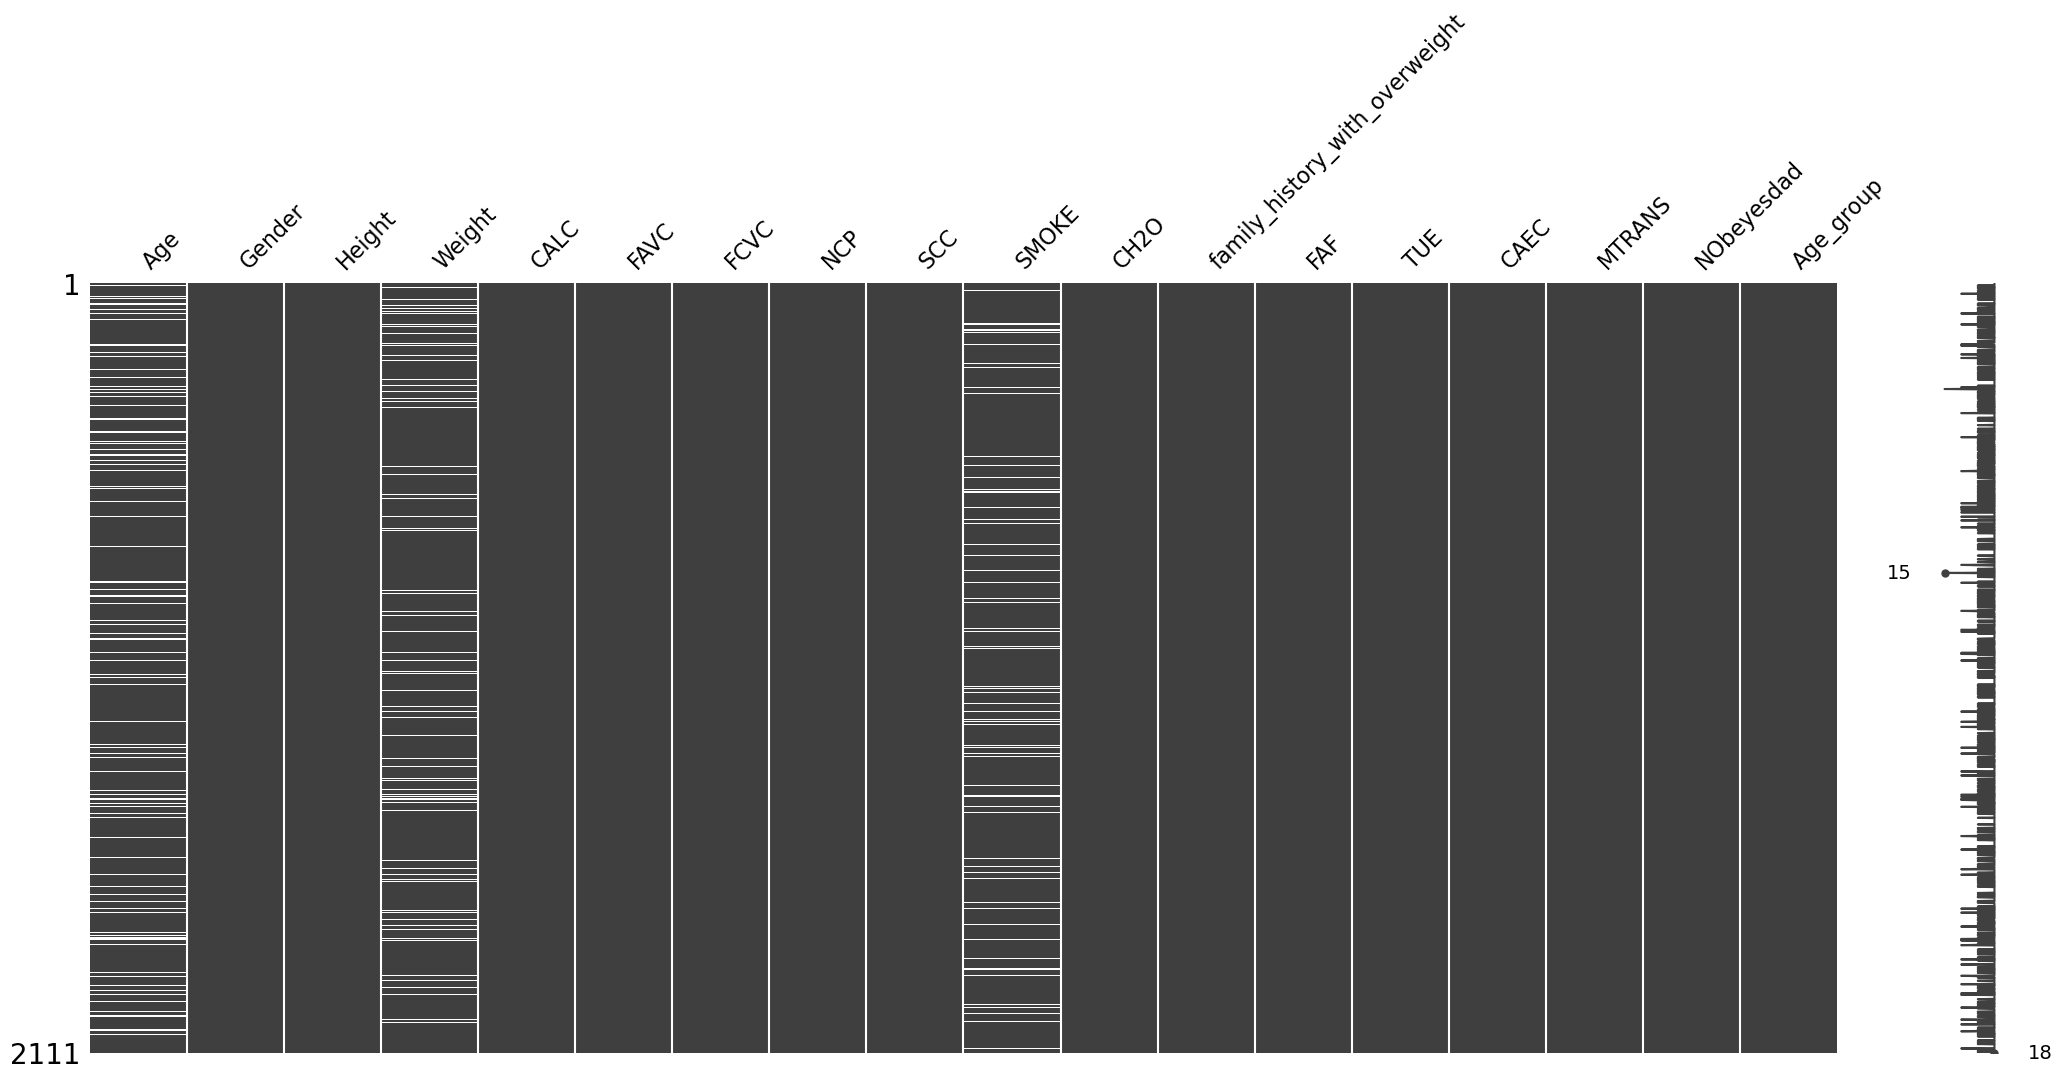

In [32]:
msno.matrix(df_with_missing_values)

Logically, there is no correlation between the missing values since I generated them randomly. However, this visualization helps me see that removing all null values may not be an option. This is because I will lose a large amount of data. Instead I will replace the null values accordingly.

<Axes: >

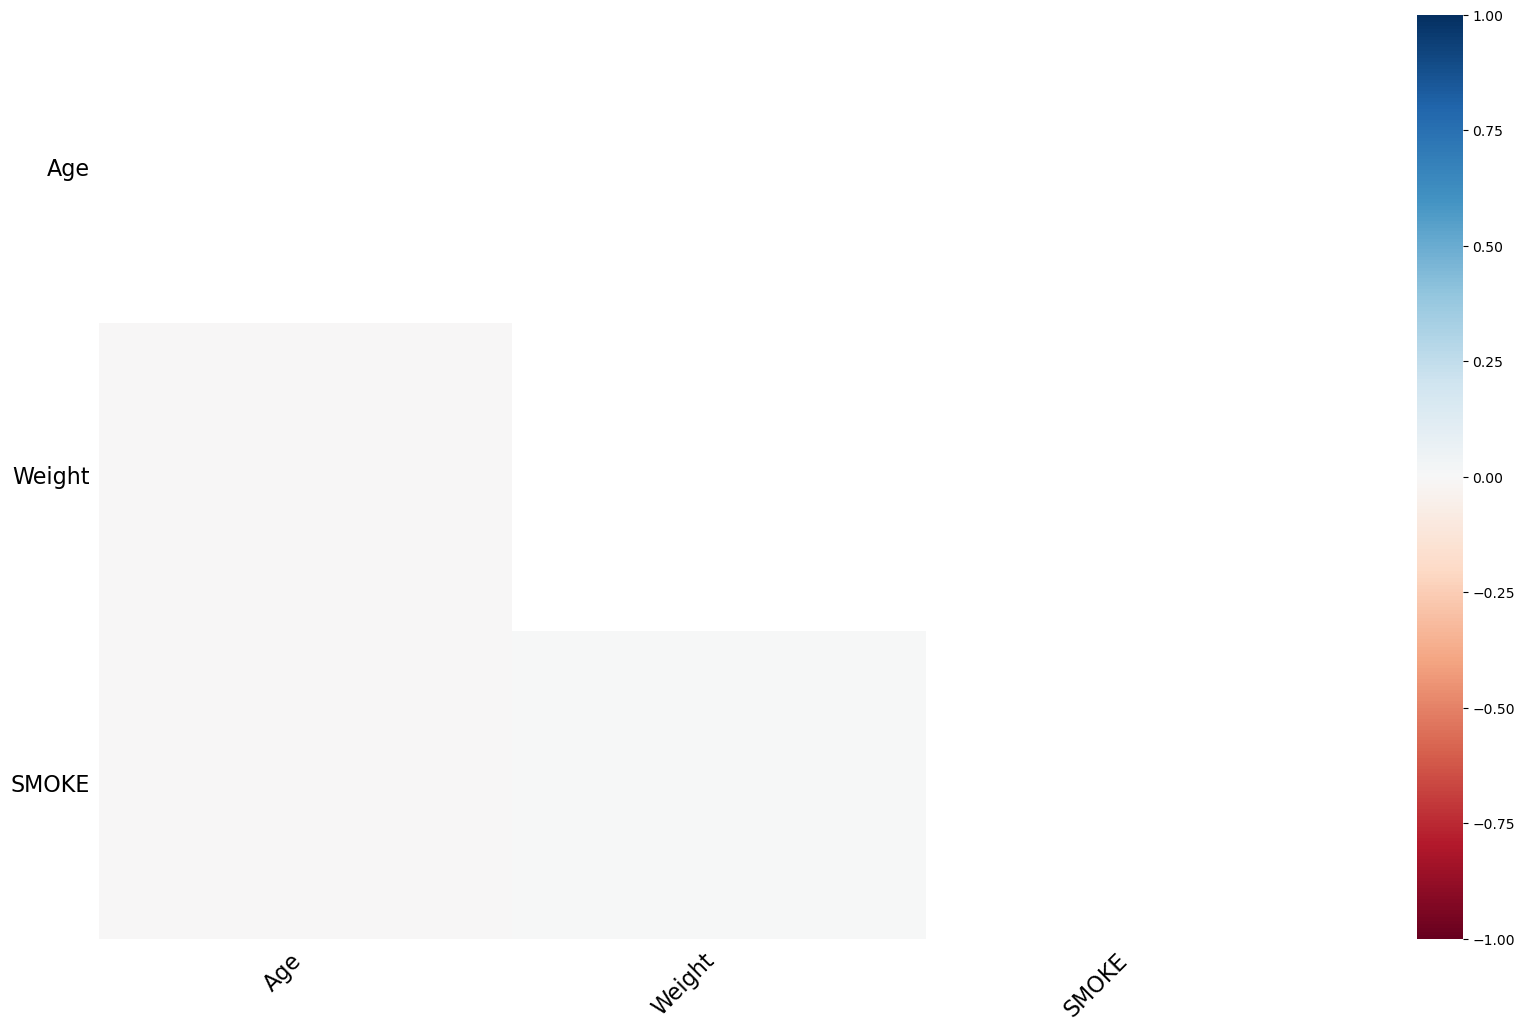

In [33]:
msno.heatmap(df_with_missing_values)

This heatmap confirms that there is no correlation between null values.

For the age column, I will replace the null values with the mean value. This is because,as seen, the majority of people in the dataset are in their 20s. In the code above, when checking the statistics of the dataframe, the mean age was 24.312600. So, I will replace null values with 24.

In [34]:
df_with_missing_values['Age'].mean()

24.324387120488325

In [35]:
df_with_missing_values['Age']=df_with_missing_values['Age'].fillna(24.0)

For the SMOKE column, I will replace the null values with the mode value ('no') since out of 2111 only 44 people smoked.

In [36]:
df_with_missing_values['SMOKE']=df_with_missing_values['SMOKE'].fillna('no')

For the weight column, I will look at the height column for a bit better replecement. The weight and height have the highest correlation of all, so I think this is suitable.

If a person is the upper quantile with height, then their weight will be the max weight.

If a person is the lower quantile with height, then their weight will be the min weight.

If a person is the middle quantile with height, then their weight will be the mean weight.

In [37]:
lower_quantile = df_with_missing_values['Height'].quantile(0.33)
middle_quantile = df_with_missing_values['Height'].quantile(0.66)

def fill_weight(row):
    if np.isnan(row['Weight']):
        if row['Height'] <= lower_quantile:
            return df_with_missing_values['Weight'].min() # if it is in the lower
        elif row['Height'] <= middle_quantile:
            return df_with_missing_values['Weight'].mean()
        else:
            return df_with_missing_values['Weight'].max()
    return row['Weight']

# Apply the function row-wise to fill in the missing values in the 'Weight' column
df_with_missing_values['Weight'] = df_with_missing_values.apply(fill_weight, axis=1)

In [38]:
df_with_missing_values.info() # all null values have been replaced

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             2111 non-null   float64 
 1   Gender                          2111 non-null   object  
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   CALC                            2111 non-null   object  
 5   FAVC                            2111 non-null   object  
 6   FCVC                            2111 non-null   float64 
 7   NCP                             2111 non-null   float64 
 8   SCC                             2111 non-null   object  
 9   SMOKE                           2111 non-null   object  
 10  CH2O                            2111 non-null   float64 
 11  family_history_with_overweight  2111 non-null   object  
 12  FAF                 

In [39]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [40]:
df_with_missing_values.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.289505,1.701677,87.677041,2.419043,2.685628,2.008011,1.010298,0.657866
std,5.979470,0.093305,30.573684,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.233816,1.630000,65.000000,2.000000,2.658738,1.584812,0.124505,0.000000
50%,23.000000,1.700499,84.451423,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,108.355733,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


When comparing the original dataframe and the one with replaced null values, the statistics seem pretty similar which is good.

## Logistic regression

I decided to use logistic regression because out of the three algorithms we have covered, this is the most suitable one.

KNN seemed like a suitable option at first but when compared (I kept the code where I tried KNN), the result was quite bad.

Linear regression is not suitable because the data predicted is not continous.

Logistic is suitable because this is multiclass classification problem, categorical data is predicted and features are independant.

In [41]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad', 'Age_group'],
      dtype='object')

In [42]:
df.head() #to see more easily the types of data in each column

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,Age_group
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight,20s
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,20s
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight,20s
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I,20s
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,20s


In [43]:
df=df.drop('Age_group', axis=1) # drop the column I created to not mess up the independancy between data

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
codes = LabelEncoder() # encoding categorical variables since the models will not work with strings
for col in ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']:
    df[col] = codes.fit_transform(df[col])

scaler = StandardScaler() # scaling continuous features
X = df.drop('NObeyesdad', axis=1)
y = codes.fit_transform(df['NObeyesdad'])

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# logistic regression
log_reg = LogisticRegression(max_iter=500) # since the dataset is quite large, this helps avoid errors
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [46]:
error_rate = [] 

for i in range(1,40):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

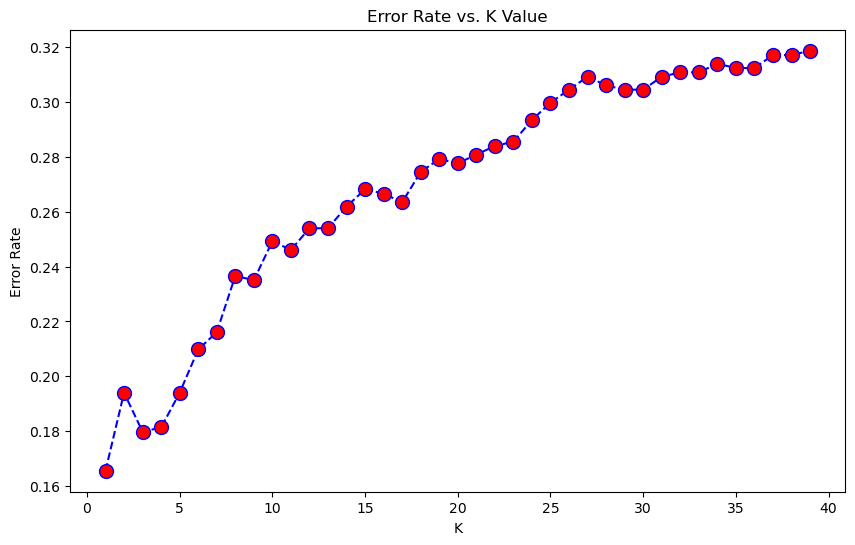

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

It is difficult to choose a suitable k value because the error rate grows as k grows. I will choose 5 because the error rate is too high for other k values. I already suspect that logistic regression is a more suitable model for this dataset.

In [48]:
print("Logistic Regression:\n", classification_report(y_test, y_pred_log))
print("KNN:\n", classification_report(y_test, y_pred_knn))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89        86
           1       0.86      0.60      0.71        93
           2       0.94      0.90      0.92       102
           3       0.91      0.98      0.94        88
           4       1.00      0.99      0.99        98
           5       0.74      0.73      0.74        88
           6       0.74      0.82      0.78        79

    accuracy                           0.86       634
   macro avg       0.86      0.86      0.85       634
weighted avg       0.86      0.86      0.86       634

KNN:
               precision    recall  f1-score   support

           0       0.71      0.93      0.80        86
           1       0.66      0.45      0.54        93
           2       0.81      0.87      0.84       102
           3       0.84      0.97      0.90        88
           4       0.99      1.00      0.99        98
           5       0.84      0.65      0.73       

Here we can clearly see that logistic regression is a better model to use since it has higher precision and accuracy.
For Insufficient Weight is 0, Normal Weight is 1, Overweight Level I is 2, Overweight Level II is 3, Obesity Type I is 4, Obesity Type II is 5 and Obesity Type III is 6, Obesity Type I is best classified with precision 1, and Obesity Type II is and Obesity Type III are the least precise with 0.74. The model overall is pretty good.

In [49]:
print(confusion_matrix(y_test,y_pred_log))

[[85  1  0  0  0  0  0]
 [20 56  0  0  0 12  5]
 [ 0  0 92  8  0  0  2]
 [ 0  0  2 86  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  8  0  0  0 64 16]
 [ 0  0  4  0  0 10 65]]


Rows represent the actual/true classes (y_test).
Columns represent the predicted classes (y_pred_log).

Most data is accurately classified (the diagonal). 89 data is not correct while 545 was correctly classified. (14.04% was innacurate as seen in the classification report above.)